<a href="https://colab.research.google.com/github/Vikas8719/My-first-model/blob/main/Houseprices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
df=pd.read_csv(r'/content/house_prices.csv')

In [76]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [79]:
df.drop(['Description','facing','overlooking','Society','Dimensions','Plot Area'],axis=1,inplace=True)

In [80]:
df.head()

,Index,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,1,2,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,2,NaN,1 Open,Freehold,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,2,NaN,1 Covered,Freehold,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,1,1,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,2,NaN,1 Covered,Co-operative Society,NaN


In [81]:
df.isnull().sum()

,0
Index,0
Title,0
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83
Furnishing,2897


In [82]:
import numpy as np

def convert_amount(val):
    if pd.isnull(val):  # already NaN
        return np.nan
    val = str(val).lower().strip()

    # Handle crore
    if "cr" in val:
        num = float(val.split()[0])
        return num * 10000000

    # Handle lakh
    elif "lakh" in val:
        num = float(val.split()[0])
        return num * 100000

    # Handle thousand
    elif "thousand" in val:
        num = float(val.split()[0])
        return num * 1000

    # If pure number
    elif val.replace('.', '', 1).isdigit():
        return float(val)

    # If not convertible → return NaN
    else:
        return np.nan

# Apply conversion
df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

# Now fill missing with median
df['Amount(in rupees)'] = df['Amount(in rupees)'].fillna(df['Amount(in rupees)'].median())


In [83]:
import re
import numpy as np

def convert_area(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case 1: Dimensions format (e.g. 30x40)
    if "x" in val:
        try:
            parts = re.split('x|×', val)   # split on x or ×
            nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
            if len(nums) == 2:
                return nums[0] * nums[1]   # area = length * width
        except:
            return np.nan

    # Case 2: Square feet
    if "sqft" in val or "sq ft" in val:
        num = re.findall(r"[\d,.]+", val)
        if num:
            return float(num[0].replace(",", ""))

    # Case 3: Square meter (convert → sqft)
    if "meter" in val or "m²" in val:
        num = re.findall(r"[\d,.]+", val)
        if num:
            sqm = float(num[0].replace(",", ""))
            return sqm * 10.7639   # 1 sq meter = 10.76 sqft

    # Case 4: Pure number
    if val.replace('.', '', 1).replace(',', '').isdigit():
        return float(val.replace(',', ''))

    # Case 5: Not usable
    return np.nan

# Apply conversion
df['Carpet Area'] = df['Carpet Area'].apply(convert_area)

# Fill missing with median
df['Carpet Area'] = df['Carpet Area'].fillna(df['Carpet Area'].median())


In [84]:
import numpy as np
import re

def convert_price(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case 1: Crore
    if "cr" in val:
        try:
            num = float(re.findall(r"[\d.]+", val)[0])
            return num * 10000000
        except:
            return np.nan

    # Case 2: Lakh
    if "lakh" in val:
        try:
            num = float(re.findall(r"[\d.]+", val)[0])
            return num * 100000
        except:
            return np.nan

    # Case 3: Thousand
    if "thousand" in val:
        try:
            num = float(re.findall(r"[\d.]+", val)[0])
            return num * 1000
        except:
            return np.nan

    # Case 4: Direct number with commas
    if re.findall(r"[\d,]+", val):
        try:
            return float(val.replace(",", ""))
        except:
            return np.nan

    # Case 5: Negotiable / NA / others
    return np.nan


# Apply conversion
df['Price (in rupees)'] = df['Price (in rupees)'].apply(convert_price)

# Drop rows where Price is still NaN (target missing)
df = df.dropna(subset=['Price (in rupees)'])


In [85]:
import re
import numpy as np

def convert_parking(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case 1: Only number (e.g., "2", "3")
    if val.isdigit():
        return int(val)

    # Case 2: Text with numbers (e.g., "1 Covered, 1 Open")
    nums = re.findall(r"\d+", val)
    if nums:
        return sum(int(n) for n in nums)

    # Case 3: "No Parking", "NA", etc.
    return 0

# Apply conversion
df['Car Parking'] = df['Car Parking'].apply(convert_parking)

# Fill missing with median (or 0 if you prefer)
df['Car Parking'] = df['Car Parking'].fillna(df['Car Parking'].median())


In [86]:
df.isnull().sum()

,0
Index,0
Title,0
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,0
Status,595
Floor,6843
Transaction,6
Furnishing,2060


In [87]:
# Fill missing with 'Unknown'
df['Status'] = df['Status'].fillna('Unknown')

# Normalize text (lowercase, strip spaces)
df['Status'] = df['Status'].str.lower().str.strip()

# Optional: Replace synonyms
df['Status'] = df['Status'].replace({
    'ready to move': 'ready',
    'under construction': 'under_construction',
    'resale': 'resale',
    'new launch': 'new_launch',
    'unknown': 'unknown'
})

# If you want Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])


In [88]:
import re
import numpy as np

def convert_floor(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case 1: "5 out of 10"
    if "out of" in val:
        try:
            num = re.findall(r"\d+", val)
            if num:
                return int(num[0])  # current floor
        except:
            return np.nan

    # Case 2: Pure number (e.g., "2", "10th")
    num = re.findall(r"\d+", val)
    if num:
        return int(num[0])

    # Case 3: Ground / Basement
    if "ground" in val:
        return 0
    if "basement" in val:
        return -1

    # Case 4: Not usable
    return np.nan

# Apply conversion
df['Floor'] = df['Floor'].apply(convert_floor)

# Fill missing with median
df['Floor'] = df['Floor'].fillna(df['Floor'].median())


In [89]:
# Fill missing
df['Transaction'] = df['Transaction'].fillna('Unknown')

# Normalize
df['Transaction'] = df['Transaction'].str.lower().str.strip()

df['Transaction'] = df['Transaction'].replace({
    'resale': 'resale',
    'new property': 'new',
    'new booking': 'new',
    'under construction': 'under_construction',
    'leasehold': 'leasehold',
    'unknown': 'unknown'
})

# Encode (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Transaction_encoded'] = le.fit_transform(df['Transaction'])


In [90]:
# Fill missing
df['Furnishing'] = df['Furnishing'].fillna('Unknown')

# Normalize
df['Furnishing'] = df['Furnishing'].str.lower().str.strip()

# Standardize
df['Furnishing'] = df['Furnishing'].replace({
    'furnished': 'furnished',
    'fully furnished': 'furnished',
    'semi-furnished': 'semi_furnished',
    'semifurnished': 'semi_furnished',
    'semi furnished': 'semi_furnished',
    'unfurnished': 'unfurnished',
    'none': 'unfurnished',
    'unknown': 'unknown'
})

# Encode (Ordinal encoding)
furnish_map = {
    'unfurnished': 0,
    'semi_furnished': 1,
    'furnished': 2,
    'unknown': -1   # optional
}
df['Furnishing_encoded'] = df['Furnishing'].map(furnish_map)


In [91]:
import re
import numpy as np

def convert_bathroom(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).strip().lower()

    # Case 1: Mixed numbers like "3+1"
    if "+" in val:
        nums = re.findall(r"[\d.]+", val)
        if nums:
            return sum(float(n) for n in nums)

    # Case 2: Single number
    nums = re.findall(r"[\d.]+", val)
    if nums:
        return float(nums[0])

    # Case 3: Not usable
    return np.nan

# Apply conversion
df['Bathroom'] = df['Bathroom'].apply(convert_bathroom)

# Fill missing with median
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())


In [92]:
import re
import numpy as np

def convert_balcony(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).strip().lower()

    # Case 1: Mixed numbers like "1+1"
    if "+" in val:
        nums = re.findall(r"[\d.]+", val)
        if nums:
            return sum(float(n) for n in nums)

    # Case 2: Single number
    nums = re.findall(r"[\d.]+", val)
    if nums:
        return float(nums[0])

    # Case 3: "No balcony" / not usable
    return 0

# Apply conversion
df['Balcony'] = df['Balcony'].apply(convert_balcony)

# Fill missing with median
df['Balcony'] = df['Balcony'].fillna(df['Balcony'].median())


In [93]:
# Fill missing
df['Ownership'] = df['Ownership'].fillna('Unknown')

# Normalize
df['Ownership'] = df['Ownership'].str.lower().str.strip()

# Standardize common categories
df['Ownership'] = df['Ownership'].replace({
    'freehold': 'freehold',
    'leasehold': 'leasehold',
    'co-operative': 'cooperative',
    'co operative': 'cooperative',
    'unknown': 'unknown'
})

# Encode (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ownership_encoded'] = le.fit_transform(df['Ownership'])


In [94]:
import re
import numpy as np

def convert_super_area(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower().strip()

    # Case 1: Dimensions like "30x40"
    if "x" in val:
        try:
            parts = re.split('x|×', val)
            nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
            if len(nums) == 2:
                return nums[0] * nums[1]
        except:
            return np.nan

    # Case 2: Square feet
    if "sqft" in val or "sq ft" in val:
        num = re.findall(r"[\d,.]+", val)
        if num:
            return float(num[0].replace(",", ""))

    # Case 3: Square meter
    if "meter" in val or "m²" in val:
        num = re.findall(r"[\d,.]+", val)
        if num:
            sqm = float(num[0].replace(",", ""))
            return sqm * 10.7639

    # Case 4: Pure number
    val_clean = val.replace(',', '')
    if val_clean.replace('.', '', 1).isdigit():
        return float(val_clean)

    # Case 5: Not usable
    return np.nan

# Apply conversion
df['Super Area'] = df['Super Area'].apply(convert_super_area)

# Fill missing with median
df['Super Area'] = df['Super Area'].fillna(df['Super Area'].median())


In [95]:
df.head()

,Index,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Status_encoded,Transaction_encoded,Furnishing_encoded,Ownership_encoded
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,17500000.0,6000.0,thane,500.0,ready,10.0,resale,unfurnished,1.0,2.0,1.0,unknown,1300.0,0,3,0,4
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,17500000.0,13799.0,thane,473.0,ready,3.0,resale,semi_furnished,2.0,2.0,1.0,freehold,1300.0,0,3,1,1
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,14000000.0,17500.0,thane,779.0,ready,10.0,resale,unfurnished,2.0,2.0,1.0,freehold,1300.0,0,3,0,1
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,16000000.0,18824.0,thane,635.0,ready,20.0,resale,unfurnished,2.0,2.0,1.0,co-operative society,1300.0,0,3,0,0
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,17500000.0,6618.0,thane,1071.0,ready,2.0,resale,unfurnished,1.0,1.0,1.0,co-operative society,680.0,0,3,0,0


In [96]:
import re

def extract_bhk(title):
    title = str(title).lower()
    match = re.search(r'(\d+)\s*bhk', title)
    if match:
        return int(match.group(1))
    else:
        return 0
df['BHK'] = df['Title'].apply(extract_bhk)
df = df.drop('Title', axis=1)



In [97]:
df.head()

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Status_encoded,Transaction_encoded,Furnishing_encoded,Ownership_encoded,BHK
0,0,17500000.0,6000.0,thane,500.0,ready,10.0,resale,unfurnished,1.0,2.0,1.0,unknown,1300.0,0,3,0,4,1
1,1,17500000.0,13799.0,thane,473.0,ready,3.0,resale,semi_furnished,2.0,2.0,1.0,freehold,1300.0,0,3,1,1,2
2,2,14000000.0,17500.0,thane,779.0,ready,10.0,resale,unfurnished,2.0,2.0,1.0,freehold,1300.0,0,3,0,1,2
4,4,16000000.0,18824.0,thane,635.0,ready,20.0,resale,unfurnished,2.0,2.0,1.0,co-operative society,1300.0,0,3,0,0,2
5,5,17500000.0,6618.0,thane,1071.0,ready,2.0,resale,unfurnished,1.0,1.0,1.0,co-operative society,680.0,0,3,0,0,1


In [98]:
df.describe()

,Index,Amount(in rupees),Price (in rupees),Carpet Area,Floor,Bathroom,Balcony,Car Parking,Super Area,Status_encoded,Transaction_encoded,Furnishing_encoded,Ownership_encoded,BHK
count,169866.000000,1.698660e+05,1.698660e+05,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000,169866.000000
mean,93169.479036,1.950845e+07,7.583772e+03,1177.992111,4.827417,2.444391,2.024566,2.400233,1337.773598,0.003503,2.284336,0.667420,2.052012,2.590948
std,54734.984200,3.941279e+07,2.724171e+04,2384.964619,4.603438,0.847787,0.823436,21.555988,470.445516,0.059081,1.278631,0.676257,1.432009,0.783583
min,0.000000,1.000000e+07,0.000000e+00,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,44715.250000,1.750000e+07,4.297000e+03,1060.000000,2.000000,2.000000,2.000000,1.000000,1300.000000,0.000000,3.000000,0.000000,1.000000,2.000000
50%,93239.500000,1.750000e+07,6.034000e+03,1071.000000,3.000000,2.000000,2.000000,1.000000,1300.000000,0.000000,3.000000,1.000000,1.000000,3.000000
75%,141115.750000,1.750000e+07,9.450000e+03,1140.000000,6.000000,3.000000,2.000000,1.000000,1300.000000,0.000000,3.000000,1.000000,4.000000,3.000000
max,187530.000000,1.400300e+10,6.700000e+06,709222.000000,200.000000,10.000000,10.000000,999.000000,40000.000000,1.000000,4.000000,2.000000,4.000000,10.000000


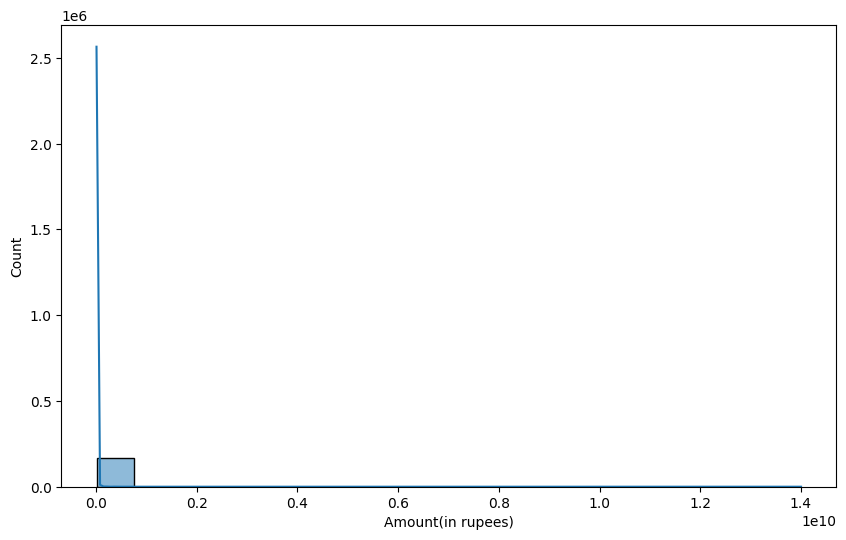

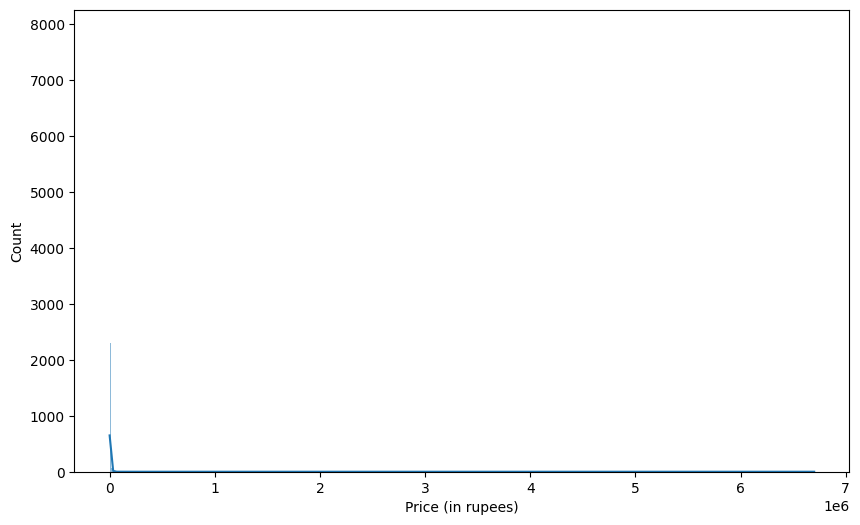

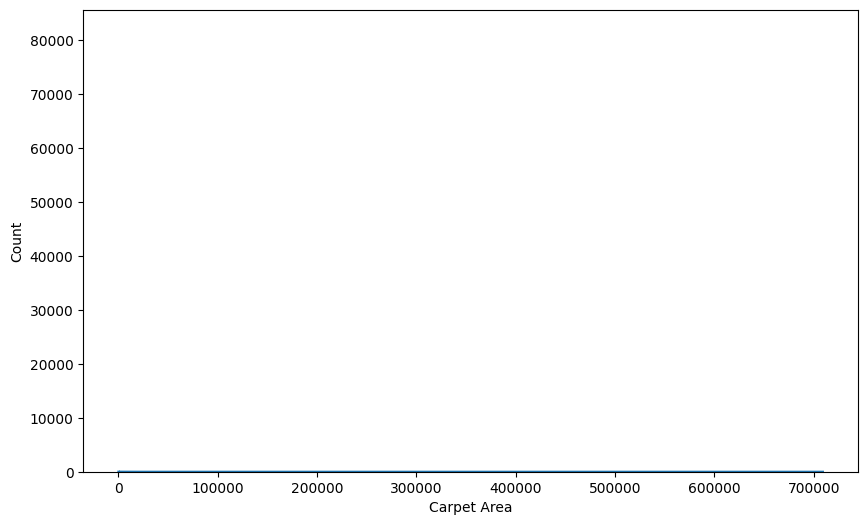

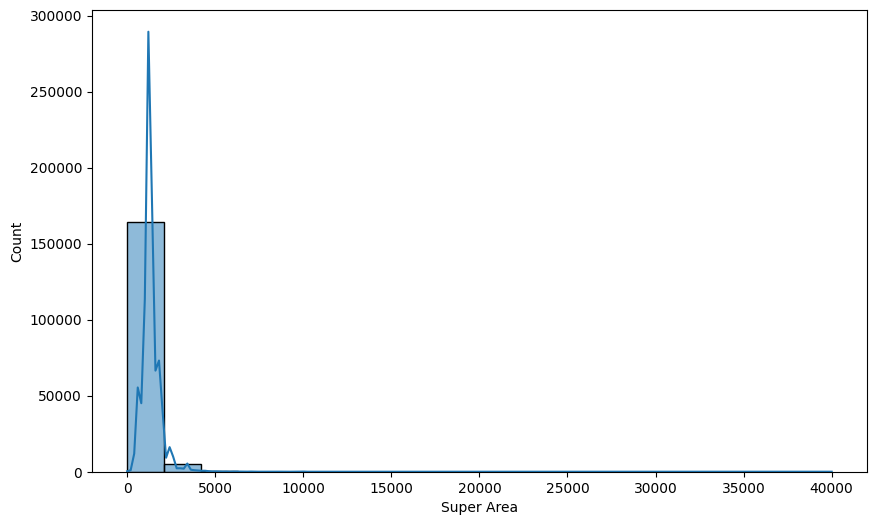

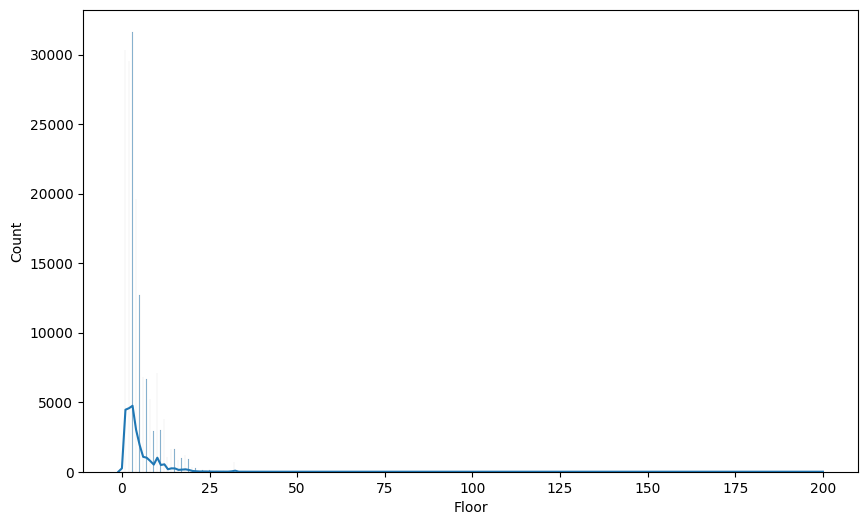

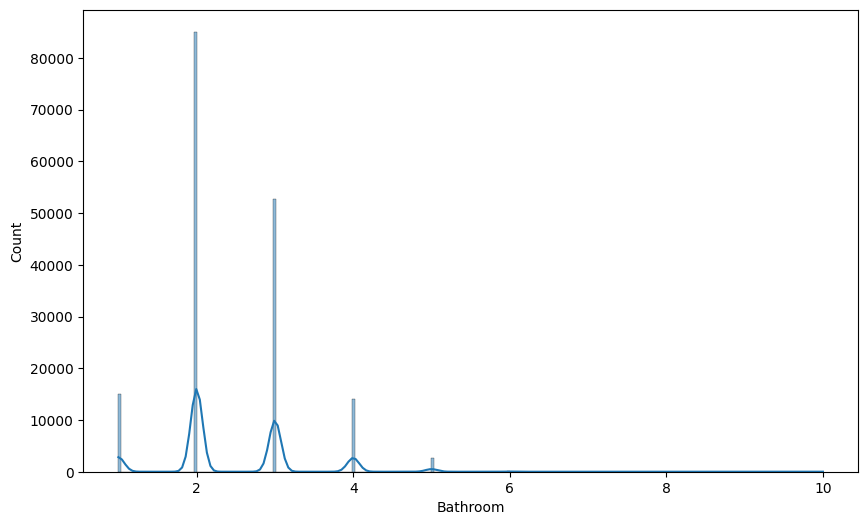

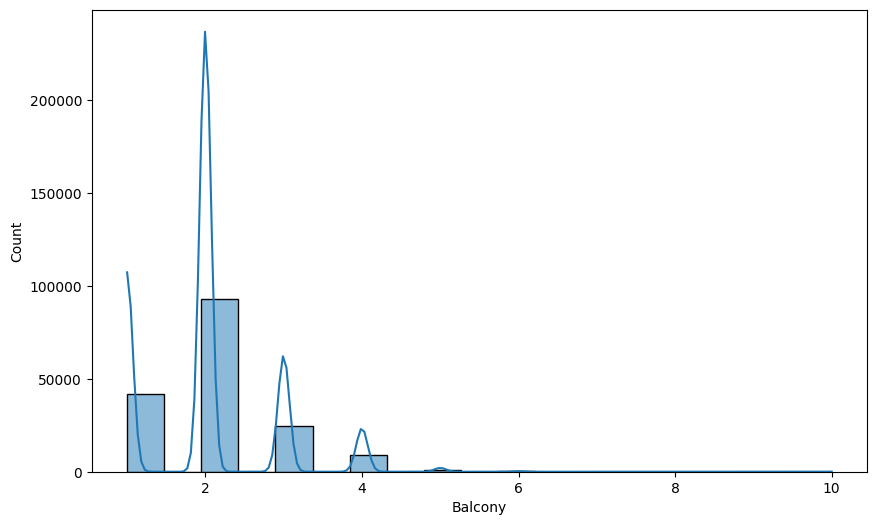

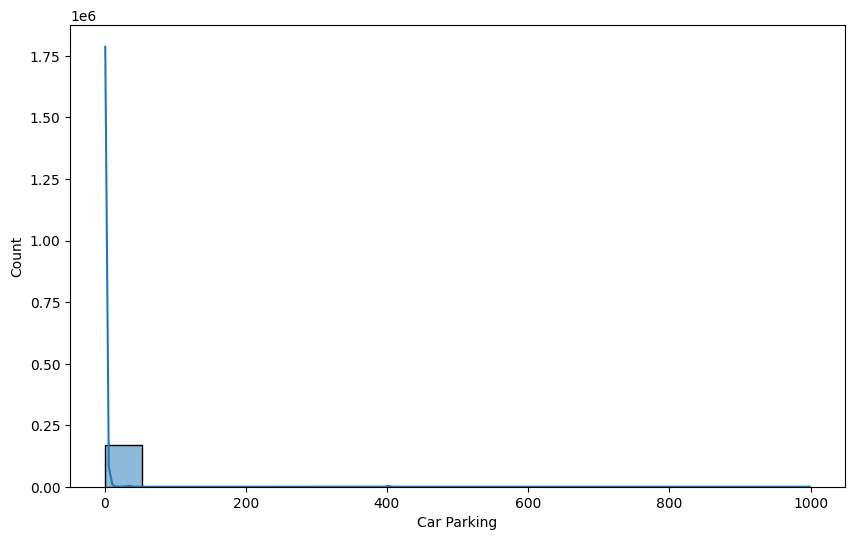

In [99]:
numeric_columns=['Amount(in rupees)','Price (in rupees)','Carpet Area','Super Area','Floor','Bathroom','Balcony','Car Parking']
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde=True)


<Axes: xlabel='Status', ylabel='count'>

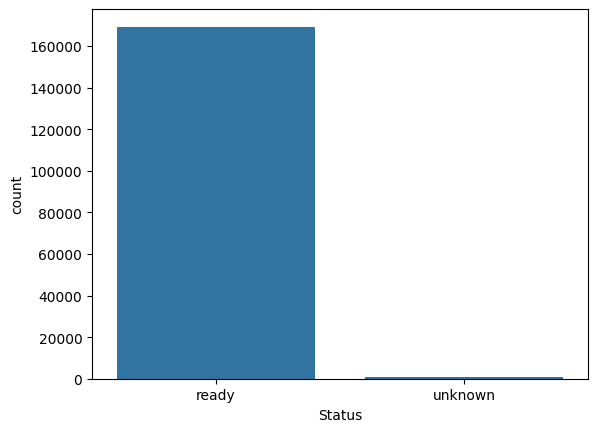

In [100]:
sns.countplot(x=df['Status'])

<Axes: xlabel='Transaction', ylabel='count'>

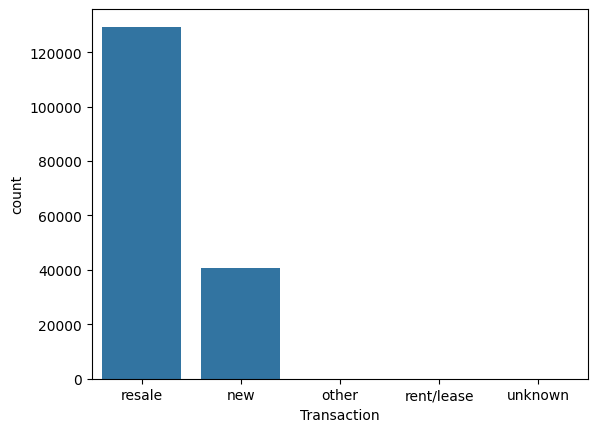

In [101]:
sns.countplot(x=df['Transaction'])

<Axes: xlabel='Furnishing', ylabel='count'>

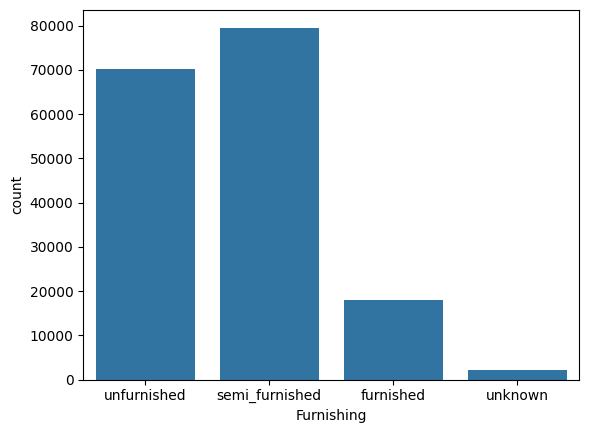

In [102]:
sns.countplot(x=df['Furnishing'])

<Axes: xlabel='Ownership', ylabel='count'>

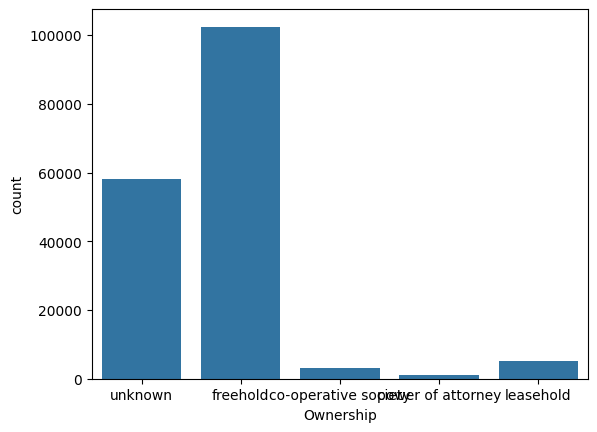

In [103]:
sns.countplot(x=df['Ownership'])

<Axes: xlabel='BHK', ylabel='count'>

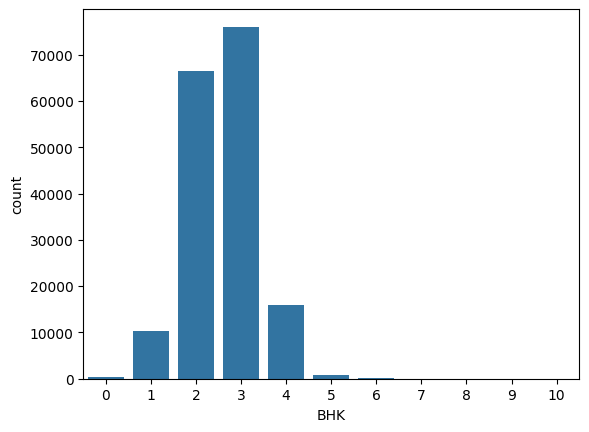

In [104]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='location', ylabel='count'>

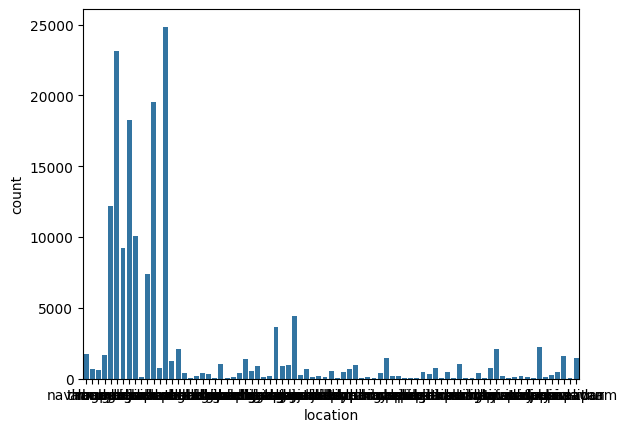

In [105]:
sns.countplot(x=df['location'])

<Axes: xlabel='Bathroom', ylabel='count'>

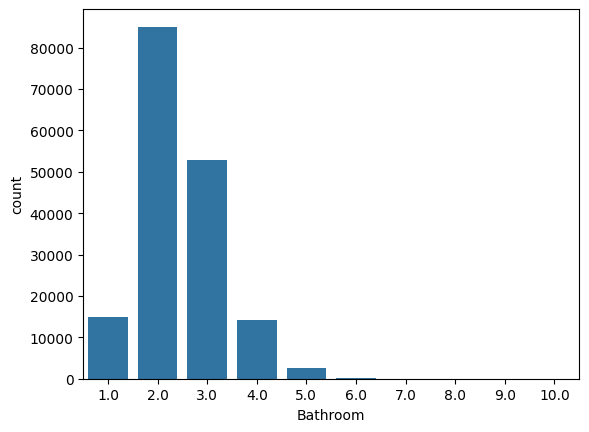

In [106]:
sns.countplot(x=df['Bathroom'])

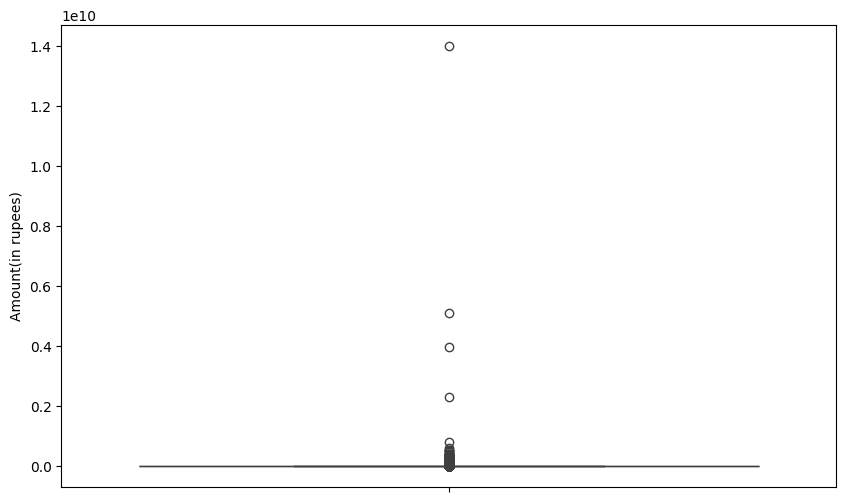

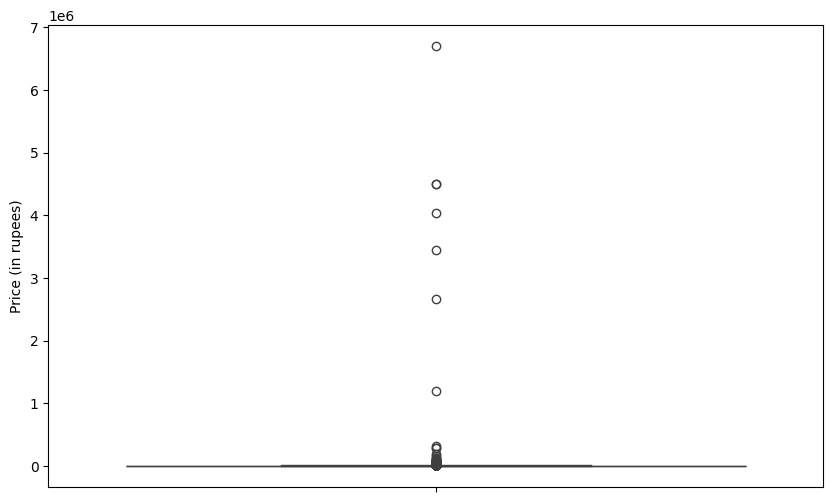

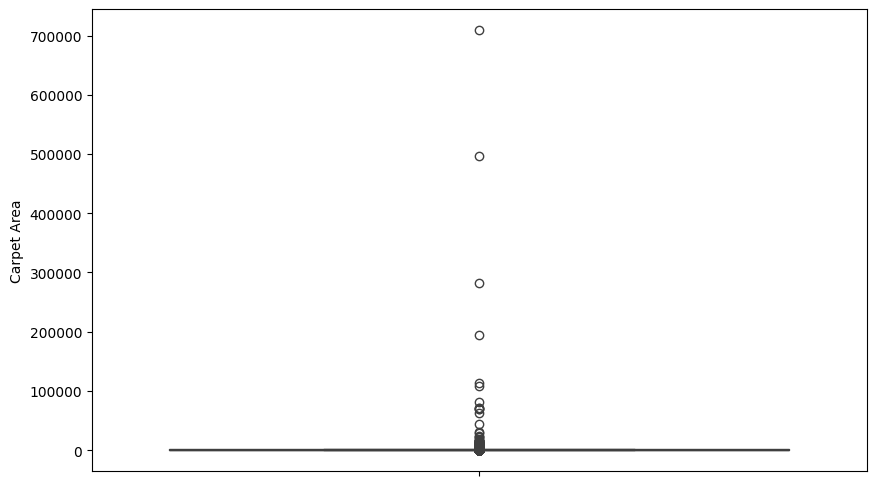

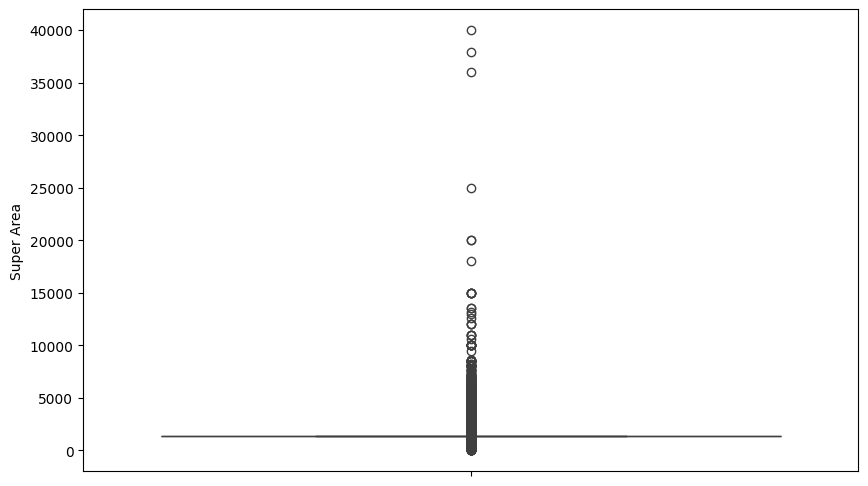

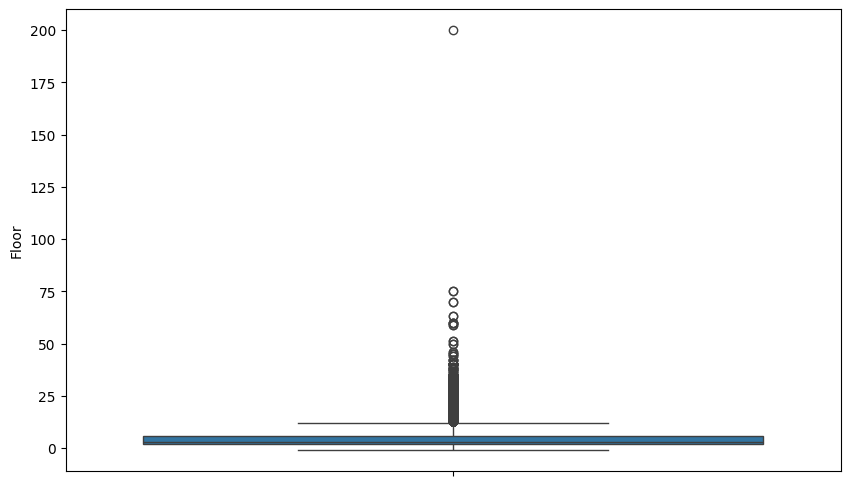

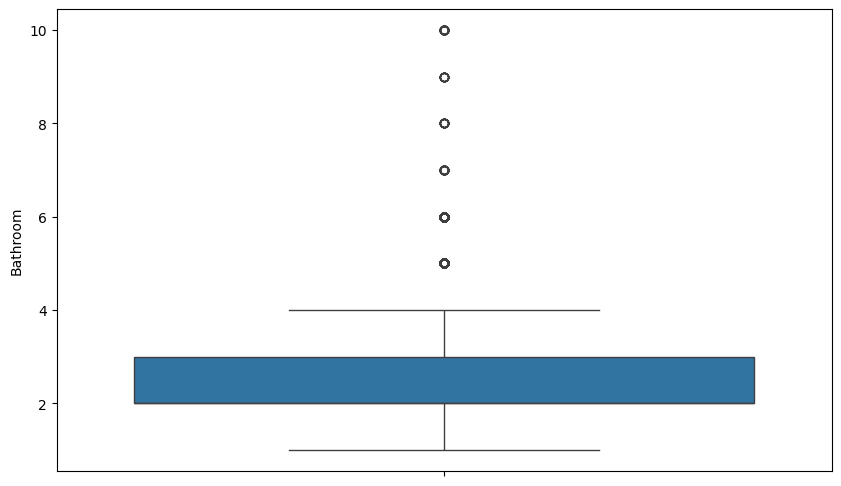

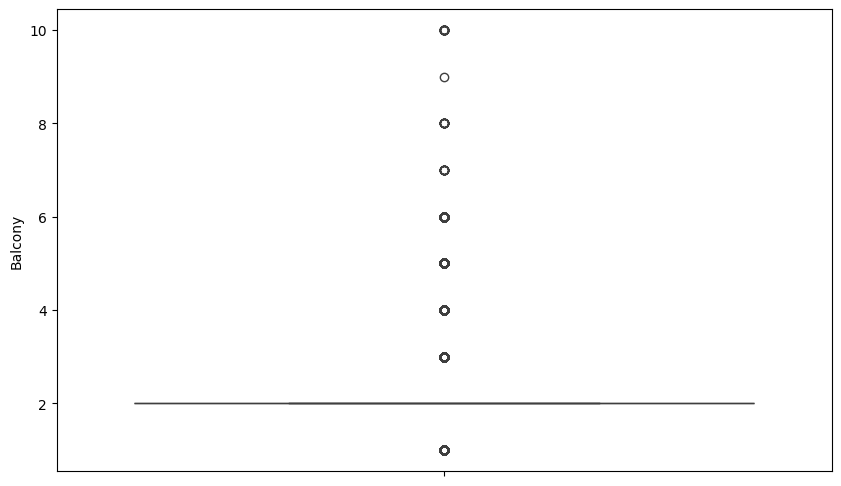

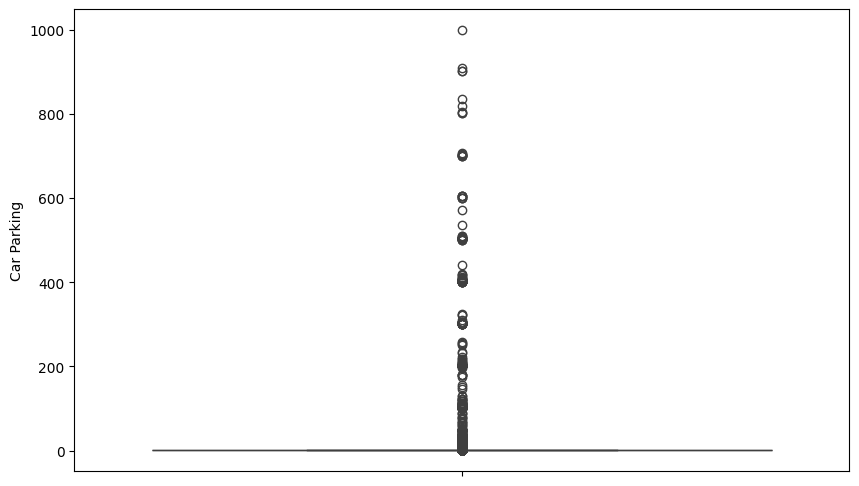

In [107]:
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])

<Axes: >

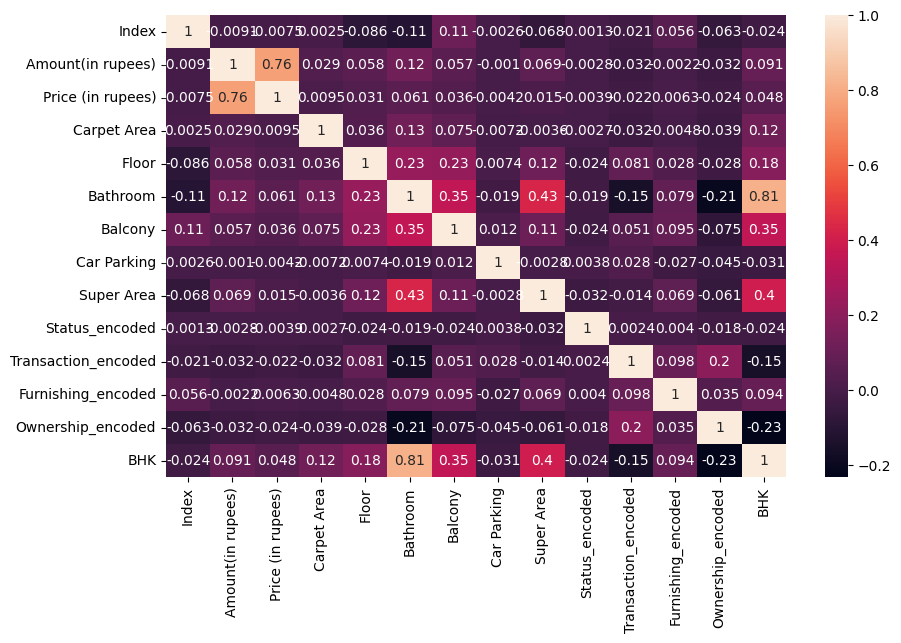

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot =True)


In [109]:
df.columns

Index(['Index', 'Amount(in rupees)', 'Price (in rupees)', 'location',
       'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Status_encoded', 'Transaction_encoded', 'Furnishing_encoded',
       'Ownership_encoded', 'BHK'],
      dtype='object')

In [110]:
df.head()

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Status_encoded,Transaction_encoded,Furnishing_encoded,Ownership_encoded,BHK
0,0,17500000.0,6000.0,thane,500.0,ready,10.0,resale,unfurnished,1.0,2.0,1.0,unknown,1300.0,0,3,0,4,1
1,1,17500000.0,13799.0,thane,473.0,ready,3.0,resale,semi_furnished,2.0,2.0,1.0,freehold,1300.0,0,3,1,1,2
2,2,14000000.0,17500.0,thane,779.0,ready,10.0,resale,unfurnished,2.0,2.0,1.0,freehold,1300.0,0,3,0,1,2
4,4,16000000.0,18824.0,thane,635.0,ready,20.0,resale,unfurnished,2.0,2.0,1.0,co-operative society,1300.0,0,3,0,0,2
5,5,17500000.0,6618.0,thane,1071.0,ready,2.0,resale,unfurnished,1.0,1.0,1.0,co-operative society,680.0,0,3,0,0,1


In [111]:
le=LabelEncoder()
df['location']=le.fit_transform(df['location'])
df['Status']=le.fit_transform(df['Status'])
df['Transaction']=le.fit_transform(df['Transaction'])
df['Furnishing']=le.fit_transform(df['Furnishing'])
df['Ownership']=le.fit_transform(df['Ownership'])


In [112]:
df.head()

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Status_encoded,Transaction_encoded,Furnishing_encoded,Ownership_encoded,BHK
0,0,17500000.0,6000.0,67,500.0,0,10.0,3,2,1.0,2.0,1.0,4,1300.0,0,3,0,4,1
1,1,17500000.0,13799.0,67,473.0,0,3.0,3,1,2.0,2.0,1.0,1,1300.0,0,3,1,1,2
2,2,14000000.0,17500.0,67,779.0,0,10.0,3,2,2.0,2.0,1.0,1,1300.0,0,3,0,1,2
4,4,16000000.0,18824.0,67,635.0,0,20.0,3,2,2.0,2.0,1.0,0,1300.0,0,3,0,0,2
5,5,17500000.0,6618.0,67,1071.0,0,2.0,3,2,1.0,1.0,1.0,0,680.0,0,3,0,0,1


In [113]:

cols = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Status_encoded', 'Floor',
        'Transaction_encoded', 'Furnishing_encoded', 'Bathroom', 'Balcony', 'Car Parking',
        'Ownership_encoded', 'Super Area', 'BHK']


In [114]:
import pandas as pd

# List of numeric + encoded features including target
cols = ['Amount(in rupees)', 'Carpet Area', 'Status_encoded', 'Floor',
        'Transaction_encoded', 'Furnishing_encoded', 'Bathroom', 'Balcony',
        'Car Parking', 'Ownership_encoded', 'Super Area', 'BHK', 'Price (in rupees)']

# Compute Pearson correlation with Price
price_corr = df[cols].corr(method='pearson')['Price (in rupees)'].sort_values(ascending=False)

# Decide Keep/Drop based on threshold
threshold = 0.1  # absolute correlation threshold
feature_decision = pd.DataFrame({
    'Feature': price_corr.index,
    'Correlation_with_Price': price_corr.values,
    'Decision': ['Keep' if abs(x) > threshold and x != 1 else 'Drop' for x in price_corr.values]
})

# Remove target row from the output
feature_decision = feature_decision[feature_decision['Feature'] != 'Price (in rupees)']

# Display
print(feature_decision)


                Feature  Correlation_with_Price Decision
1     Amount(in rupees)                0.761661     Keep
2              Bathroom                0.061423     Drop
3                   BHK                0.047818     Drop
4               Balcony                0.036095     Drop
5                 Floor                0.030669     Drop
6            Super Area                0.015171     Drop
7           Carpet Area                0.009549     Drop
8    Furnishing_encoded                0.006346     Drop
9        Status_encoded               -0.003883     Drop
10          Car Parking               -0.004246     Drop
11  Transaction_encoded               -0.021533     Drop
12    Ownership_encoded               -0.024020     Drop


In [115]:
keep_features = feature_decision[feature_decision['Decision'] == 'Keep']['Feature'].tolist()
keep_features.append('Price (in rupees)')
df = df[keep_features]
print("Remaining columns in df:", df.columns.tolist())


Remaining columns in df: ['Amount(in rupees)', 'Price (in rupees)']


In [116]:
df.head()

,Amount(in rupees),Price (in rupees)
0,17500000.0,6000.0
1,17500000.0,13799.0
2,14000000.0,17500.0
4,16000000.0,18824.0
5,17500000.0,6618.0


In [117]:
x =df.drop('Price (in rupees)',axis=1)
y=df['Price (in rupees)']

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
!pip install optuna
!pip install xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 1.4 MB/s eta 0:00:00


In [140]:
import optuna
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Define objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical("model", ["RandomForest", "XGBoost", "CatBoost", "LGBM"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000)
        max_depth = trial.suggest_int("rf_max_depth", 3, 20)
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 20)

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 100, 1000)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 20)
        learning_rate = trial.suggest_float("xgb_lr", 0.01, 0.3)
        subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
        colsample_bytree = trial.suggest_float("xgb_colsample", 0.5, 1.0)

        model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

    elif model_name == "CatBoost":
        iterations = trial.suggest_int("cat_iterations", 100, 1000)
        depth = trial.suggest_int("cat_depth", 3, 12)
        learning_rate = trial.suggest_float("cat_lr", 0.01, 0.3)
        l2_leaf_reg = trial.suggest_float("cat_l2", 1, 10)

        model = CatBoostRegressor(
            iterations=iterations,
            depth=depth,
            learning_rate=learning_rate,
            l2_leaf_reg=l2_leaf_reg,
            verbose=0,
            random_state=42
        )

    else:  # LGBM
        n_estimators = trial.suggest_int("lgb_n_estimators", 100, 1000)
        max_depth = trial.suggest_int("lgb_max_depth", 3, 20)
        learning_rate = trial.suggest_float("lgb_lr", 0.01, 0.3)
        num_leaves = trial.suggest_int("lgb_leaves", 20, 150)

        model = lgb.LGBMRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            random_state=42
        )

    # Train and predict
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluate with RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Create Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)  # adjust n_trials as needed

# Best trial
best_trial = study.best_trial
print("Best RMSE:", best_trial.value)
print("Best hyperparameters:", best_trial.params)


[I 2025-10-04 09:41:28,443] A new study created in memory with name: no-name-d941158b-57be-4707-a818-3c9b0931baaa
[I 2025-10-04 09:41:42,492] Trial 0 finished with value: 42479.63283603757 and parameters: {'model': 'CatBoost', 'cat_iterations': 551, 'cat_depth': 9, 'cat_lr': 0.21458032334630953, 'cat_l2': 5.050624015327538}. Best is trial 0 with value: 42479.63283603757.
[I 2025-10-04 09:41:44,151] Trial 1 finished with value: 29213.824500174887 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 429, 'xgb_max_depth': 4, 'xgb_lr': 0.09443952562258476, 'xgb_subsample': 0.8756897875231704, 'xgb_colsample': 0.9781702780147508}. Best is trial 1 with value: 29213.824500174887.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:42:02,242] Trial 2 finished with value: 42696.2343542698 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 933, 'lgb_max_depth': 19, 'lgb_lr': 0.09101688842727816, 'lgb_leaves': 127}. Best is trial 1 with value: 29213.824500174887.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:42:07,222] Trial 3 finished with value: 42695.89661860383 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 769, 'lgb_max_depth': 8, 'lgb_lr': 0.14148378160211386, 'lgb_leaves': 135}. Best is trial 1 with value: 29213.824500174887.
[I 2025-10-04 09:42:20,857] Trial 4 finished with value: 42479.96984524986 and parameters: {'model': 'CatBoost', 'cat_iterations': 980, 'cat_depth': 4, 'cat_lr': 0.03303602082970439, 'cat_l2': 2.4270990875769987}. Best is trial 1 with value: 29213.824500174887.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:42:28,673] Trial 5 finished with value: 42696.195691778754 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 559, 'lgb_max_depth': 16, 'lgb_lr': 0.16709737395409957, 'lgb_leaves': 136}. Best is trial 1 with value: 29213.824500174887.
[I 2025-10-04 09:42:54,144] Trial 6 finished with value: 31743.90981682339 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 845, 'rf_max_depth': 17, 'rf_min_samples_split': 14}. Best is trial 1 with value: 29213.824500174887.
[I 2025-10-04 09:43:07,800] Trial 7 finished with value: 42479.25977709914 and parameters: {'model': 'CatBoost', 'cat_iterations': 408, 'cat_depth': 11, 'cat_lr': 0.1603077760143307, 'cat_l2': 6.537773448635224}. Best is trial 1 with value: 29213.824500174887.
[I 2025-10-04 09:43:09,190] Trial 8 finished with value: 29213.432845678795 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 178, 'xgb_max_depth': 13, 'xgb_lr': 0.21807170696200867, 'xgb_subsample': 0.762918468127217, 'xgb_colsample': 0.7

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:44:13,081] Trial 26 finished with value: 42697.11498395684 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 102, 'lgb_max_depth': 3, 'lgb_lr': 0.28425667123171783, 'lgb_leaves': 26}. Best is trial 20 with value: 29209.558345500485.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-04 09:44:42,895] Trial 27 finished with value: 31708.84564904504 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 968, 'rf_max_depth': 20, 'rf_min_samples_split': 20}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:44:44,518] Trial 28 finished with value: 42480.19740632367 and parameters: {'model': 'CatBoost', 'cat_iterations': 142, 'cat_depth': 3, 'cat_lr': 0.2843438824676934, 'cat_l2': 9.12911037926575}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:45:03,549] Trial 29 finished with value: 42482.96718392954 and parameters: {'model': 'CatBoost', 'cat_iterations': 970, 'cat_depth': 7, 'cat_lr': 0.016302873309151117, 'cat_l2': 1.4346520422645819}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:45:08,372] Trial 30 finished with value: 29212.77351212919 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 695, 'xgb_max_depth': 9, 'xgb_lr': 0.13211259789482965, 'xgb_subsample': 0.5504802286997488, 'xgb_col

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:45:31,864] Trial 35 finished with value: 42696.35668562025 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 100, 'lgb_max_depth': 12, 'lgb_lr': 0.283791454484866, 'lgb_leaves': 45}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:45:35,696] Trial 36 finished with value: 29215.399974856795 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 652, 'xgb_max_depth': 7, 'xgb_lr': 0.1578481519153791, 'xgb_subsample': 0.647882767001971, 'xgb_colsample': 0.6244719069704917}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:45:42,447] Trial 37 finished with value: 29216.638988260016 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 791, 'xgb_max_depth': 7, 'xgb_lr': 0.053971790678452855, 'xgb_subsample': 0.5609243010072699, 'xgb_colsample': 0.6265464470641735}. Best is trial 20 with value: 29209.558345500485.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:45:43,915] Trial 38 finished with value: 42712.31600580264 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 410, 'lgb_max_depth': 3, 'lgb_lr': 0.013164904130218397, 'lgb_leaves': 81}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:46:13,603] Trial 39 finished with value: 42479.12695332567 and parameters: {'model': 'CatBoost', 'cat_iterations': 692, 'cat_depth': 12, 'cat_lr': 0.09451428821288912, 'cat_l2': 9.904405032353814}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:46:31,317] Trial 40 finished with value: 30616.84885002081 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 573, 'rf_max_depth': 13, 'rf_min_samples_split': 2}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:46:35,905] Trial 41 finished with value: 29218.935785906 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 662, 'xgb_max_depth': 9, 'xgb_lr': 0.13361272679547026, 'xgb_subsample': 0.5576446352784387, 'xgb_colsample': 0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:47:15,510] Trial 48 finished with value: 42696.12067727923 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 394, 'lgb_max_depth': 10, 'lgb_lr': 0.20206810217431848, 'lgb_leaves': 87}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:47:17,469] Trial 49 finished with value: 42479.12061040956 and parameters: {'model': 'CatBoost', 'cat_iterations': 131, 'cat_depth': 6, 'cat_lr': 0.25346127588179823, 'cat_l2': 4.5056547681679495}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:47:25,449] Trial 50 finished with value: 29216.24983490471 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 753, 'xgb_max_depth': 12, 'xgb_lr': 0.057912554917605844, 'xgb_subsample': 0.5337847518154779, 'xgb_colsample': 0.8331768035929351}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:47:32,765] Trial 51 finished with value: 29213.73083294454 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 705, 'xgb_max_depth': 10, 'xgb_lr

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:50:00,780] Trial 70 finished with value: 42696.27364509451 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 990, 'lgb_max_depth': 15, 'lgb_lr': 0.012652682695622308, 'lgb_leaves': 93}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:50:06,110] Trial 71 finished with value: 29209.565919237266 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 724, 'xgb_max_depth': 10, 'xgb_lr': 0.14149588777702599, 'xgb_subsample': 0.5311102740313486, 'xgb_colsample': 0.6642235663157964}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:50:13,798] Trial 72 finished with value: 29220.85585104442 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 731, 'xgb_max_depth': 11, 'xgb_lr': 0.2986427803162204, 'xgb_subsample': 0.5318698874267471, 'xgb_colsample': 0.701497639258895}. Best is trial 20 with value: 29209.558345500485.
[I 2025-10-04 09:50:18,537] Trial 73 finished with value: 29216.4580114269 and parameters: {'model': 'XGBoost', 'xgb_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:51:35,757] Trial 85 finished with value: 42696.099717718665 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 679, 'lgb_max_depth': 20, 'lgb_lr': 0.22632106676581853, 'lgb_leaves': 57}. Best is trial 79 with value: 29206.798005234643.
[I 2025-10-04 09:51:42,255] Trial 86 finished with value: 42478.673448331116 and parameters: {'model': 'CatBoost', 'cat_iterations': 363, 'cat_depth': 5, 'cat_lr': 0.17702833808177326, 'cat_l2': 3.470328267640027}. Best is trial 79 with value: 29206.798005234643.
[I 2025-10-04 09:51:47,873] Trial 87 finished with value: 29206.211039178394 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 719, 'xgb_max_depth': 12, 'xgb_lr': 0.26885947114400116, 'xgb_subsample': 0.559985146582414, 'xgb_colsample': 0.8794926767160554}. Best is trial 87 with value: 29206.211039178394.
[I 2025-10-04 09:51:55,985] Trial 88 finished with value: 29227.272652773998 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 758, 'xgb_max_depth': 13, 'xgb_l

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:54:20,847] Trial 109 finished with value: 42696.12203358142 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 313, 'lgb_max_depth': 6, 'lgb_lr': 0.10371416088099945, 'lgb_leaves': 99}. Best is trial 102 with value: 29205.8835667962.
[I 2025-10-04 09:54:27,299] Trial 110 finished with value: 29214.899383383534 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 734, 'xgb_max_depth': 14, 'xgb_lr': 0.2391159936742011, 'xgb_subsample': 0.5586589837169013, 'xgb_colsample': 0.9396209010854247}. Best is trial 102 with value: 29205.8835667962.
[I 2025-10-04 09:54:33,969] Trial 111 finished with value: 29217.302917183268 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 666, 'xgb_max_depth': 17, 'xgb_lr': 0.2081640345703051, 'xgb_subsample': 0.5113351441584685, 'xgb_colsample': 0.9780795082992769}. Best is trial 102 with value: 29205.8835667962.
[I 2025-10-04 09:54:40,063] Trial 112 finished with value: 29207.26454508764 and parameters: {'model': 'XGBoost', 'xgb

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 09:57:28,051] Trial 136 finished with value: 42695.861667403864 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 758, 'lgb_max_depth': 13, 'lgb_lr': 0.06185013966903451, 'lgb_leaves': 21}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 09:57:40,870] Trial 137 finished with value: 42479.621637593555 and parameters: {'model': 'CatBoost', 'cat_iterations': 374, 'cat_depth': 11, 'cat_lr': 0.23278128983408264, 'cat_l2': 1.083822005112804}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 09:57:53,161] Trial 138 finished with value: 31770.39134127632 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 407, 'rf_max_depth': 20, 'rf_min_samples_split': 7}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 09:58:00,765] Trial 139 finished with value: 29210.768157988918 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 686, 'xgb_max_depth': 17, 'xgb_lr': 0.14806123410171737, 'xgb_subsample': 0.5422047108933128, 'xgb_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 1
[LightGBM] [Info] Start training from score 7519.715546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-10-04 10:02:30,143] Trial 176 finished with value: 42696.422221320405 and parameters: {'model': 'LGBM', 'lgb_n_estimators': 233, 'lgb_max_depth': 17, 'lgb_lr': 0.23315620445219254, 'lgb_leaves': 114}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 10:02:36,267] Trial 177 finished with value: 29207.806277008338 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 714, 'xgb_max_depth': 19, 'xgb_lr': 0.21309699213158817, 'xgb_subsample': 0.519330320338797, 'xgb_colsample': 0.8823139556233015}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 10:02:45,268] Trial 178 finished with value: 29226.643465248602 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 758, 'xgb_max_depth': 19, 'xgb_lr': 0.2152567261906561, 'xgb_subsample': 0.5182456274482133, 'xgb_colsample': 0.8757403992102825}. Best is trial 114 with value: 29203.673298943086.
[I 2025-10-04 10:02:51,281] Trial 179 finished with value: 29211.274578474724 and parameters: {'model': 'XGBo

Best RMSE: 29203.673298943086
Best hyperparameters: {'model': 'XGBoost', 'xgb_n_estimators': 691, 'xgb_max_depth': 19, 'xgb_lr': 0.2562831489196817, 'xgb_subsample': 0.5236820939243082, 'xgb_colsample': 0.9085685242989204}


In [142]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
best_params = {
    'n_estimators': 691,
    'max_depth': 19,
    'learning_rate': 0.2562831489196817,
    'subsample': 0.5236820939243082,
    'colsample_bytree': 0.9085685242989204,
    'random_state': 42
}

xgb_model = xgb.XGBRegressor(**best_params)

xgb_model.fit(x_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9085685242989204, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2562831489196817,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=19, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=691, n_jobs=None,
             num_parallel_tree=None, ...)

In [143]:

y_pred = xgb_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final XGBoost Model Performance:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Final XGBoost Model Performance:
RMSE: 29203.673298943086
R² Score: 0.5689942095377363


In [145]:
import joblib

# sirf model save karo
joblib.dump(xgb_model, "final_xgb_model.pkl")


['final_xgb_model.pkl']